In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
fluo = pd.read_csv('../trace_fluorescnece/data/total_fluo_peduncle_0hour_40x_4fps_ex3.csv')
length = pd.read_csv('../find_midline/output/lengths_peduncle_0hour_40x_4fps_ex3_002.csv')
# pfluo = pd.read_csv('/home/shashank/Downloads/hydra_data_analysis/peduncle_fluo/output/pedunc_fluo_NGCaMP6_50X_20fps_M1_001_R1.csv')
# x = np.linspace(0, len(fluo)/20, len(fluo))

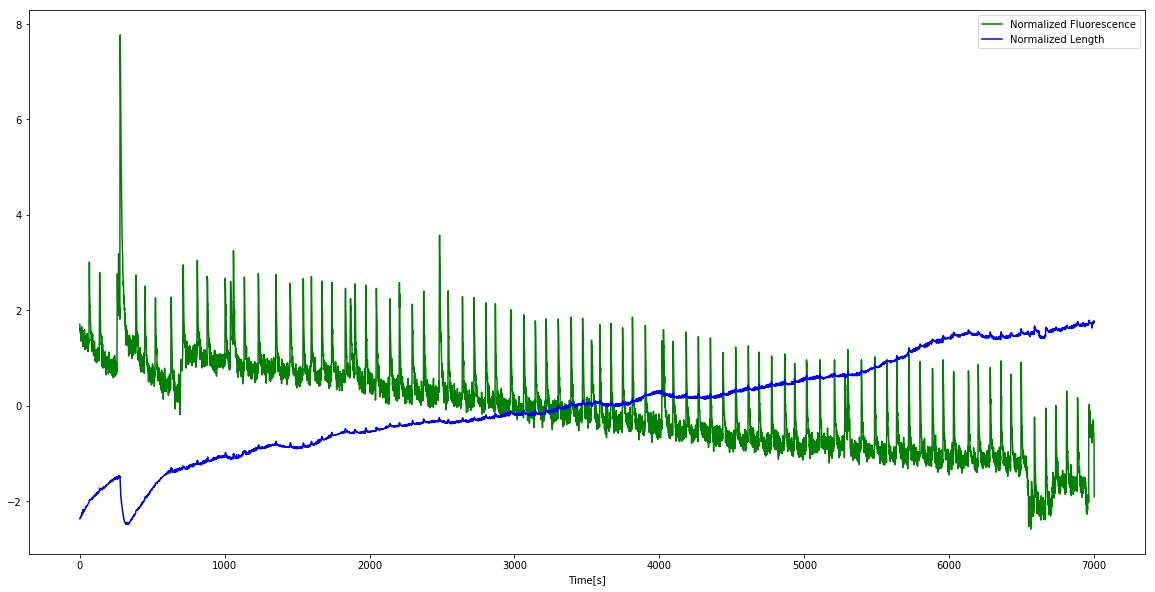

In [9]:
norm_fluo = (fluo-np.mean(fluo))/np.std(fluo)
norm_length = (length-np.mean(length))/(np.std(length))

plt.figure(figsize=(20,10))
plt.plot(norm_fluo,'g',label="Normalized Fluorescence")
plt.plot(norm_length, 'b', label="Normalized Length")
plt.legend()
plt.xlabel('Time[s]')
plt.show()

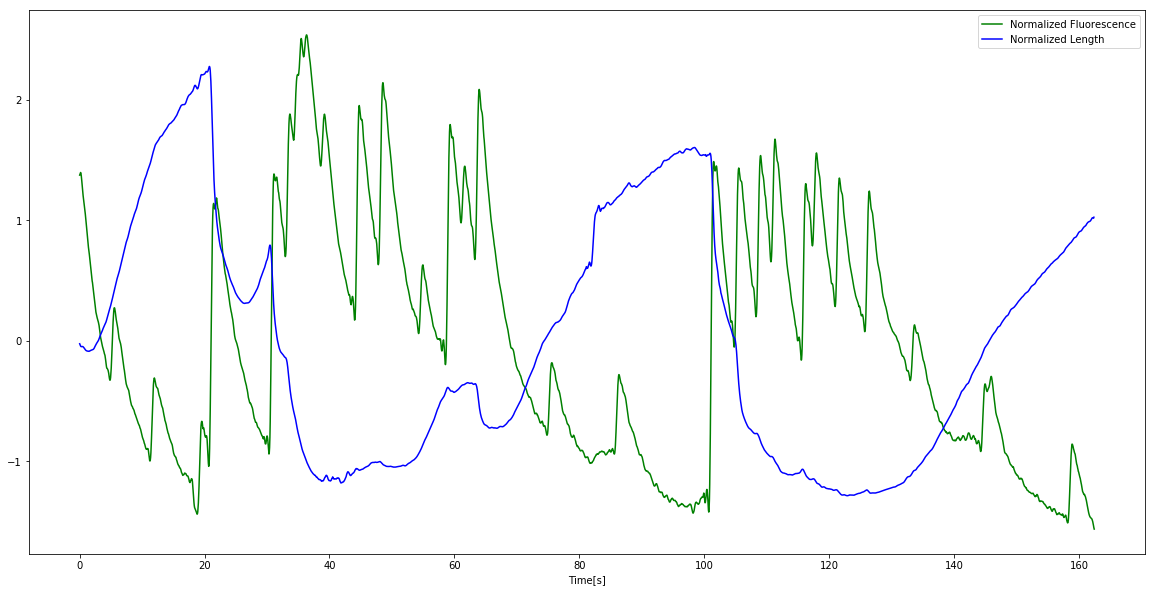

In [87]:
# Smooth data
from scipy.signal import savgol_filter
norm_fluo_smooth = savgol_filter(np.reshape(norm_fluo.values, -1), 51, 10)
norm_length_smooth = savgol_filter(np.reshape(norm_length.values, -1), 51, 10)

# norm_fluo_smooth = np.reshape(norm_fluo.values, -1)
# norm_length_smooth = np.reshape(norm_length.values, -1)

plt.figure(figsize=(20,10))
plt.plot(x, norm_fluo_smooth,'g',label="Normalized Fluorescence")
plt.plot(x[:-1], norm_length_smooth, 'b', label="Normalized Length")
plt.legend()
plt.xlabel('Time[s]')
plt.show()

In [88]:
# 1st derivative
deriv_fluo = norm_fluo_smooth[1:] - norm_fluo_smooth[:-1]
deriv_length = norm_length_smooth[1:] - norm_length_smooth[:-1]
deriv_length[deriv_length>0.2]=0

# 2nd derivative
deriv_fluo_2 = deriv_fluo[1:] - deriv_fluo[:-1]
deriv_length_2 = deriv_length[1:] - deriv_length[:-1]

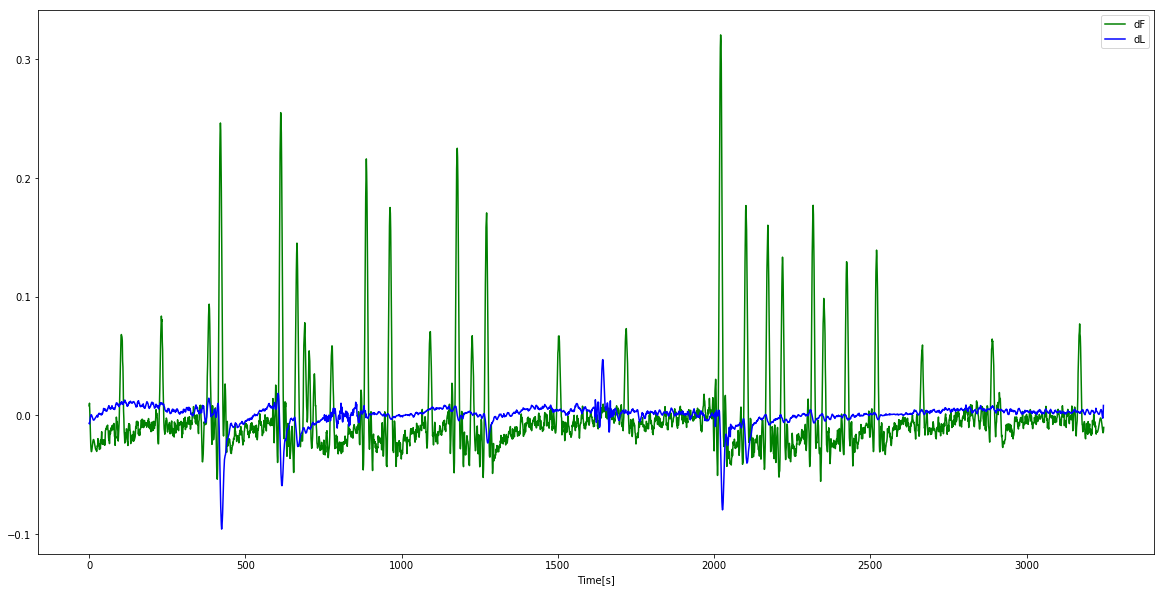

In [90]:
plt.figure(figsize=(20,10))
plt.plot(deriv_fluo,'g',label="dF")
plt.plot(deriv_length, 'b', label="dL")
plt.legend()
plt.xlabel('Time[s]')
plt.show()

# plt.figure(figsize=(20,10))
# plt.plot(x[:-2], deriv_fluo_2,'g',label="dF")
# plt.plot(x[:-3], deriv_length_2, 'b', label="dL")
# plt.legend()
# plt.xlabel('Time[s]')
# plt.show()

In [68]:
# Locate the contractions
inds = np.argsort(deriv_length)

In [104]:
contrs = []
contrs.append(400+np.argmin(deriv_length[400:500]))
contrs.append(500+np.argmin(deriv_length[500:750]))
contrs.append(1000+np.argmin(deriv_length[1000:1500]))
contrs.append(1800+np.argmin(deriv_length[1800:2200]))

In [105]:
contrs

[424, 617, 1276, 2027]